<a href="https://colab.research.google.com/github/pushkarjain1009/ML-Problems/blob/master/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Importing files 

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/winequality-red.csv")
df = pd.DataFrame(data)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


fixed acidity 	-	 0.0
volatile acidity 	-	 0.0
citric acid 	-	 0.0
residual sugar 	-	 0.0
chlorides 	-	 0.0
free sulfur dioxide 	-	 0.0
total sulfur dioxide 	-	 0.0
density 	-	 0.0
pH 	-	 0.0
sulphates 	-	 0.0
alcohol 	-	 0.0
quality 	-	 0.0


> Since data does'nt contain any null values, we can move further

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


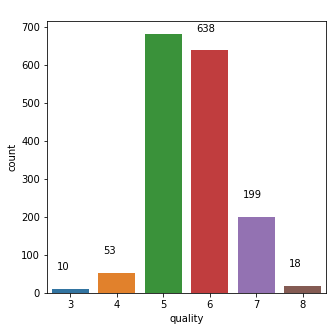

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='quality', data=df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


> Here this bar graph easily shows how data is imbalanced. Less than 1% data is in class __3__. So, first, we have to balance the data in to get more precise predictions.
> For that we are using both Under Sampling and Over sampling


> Here we are, firstly, under sampling class 5 and 6 to the level of class 7

In [ ]:
class_7 = df[df['quality'] == 7]                            # Class to which we bring other classes.

class_5 = df[df['quality'] == 5].sample(n = len(class_7))   # UnderSampling the class to make data balanced
class_6 = df[df['quality'] == 6].sample(n = len(class_7))   # UnderSampling the class to make data balanced

new_df = pd.concat([df[df['quality'] == 3], df[df['quality'] == 4], class_5, class_6, class_7, df[df['quality'] == 8]]).sample(frac=1)
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
437,11.1,0.450,0.73,3.2,0.066,6.0,22.0,0.99860,3.17,0.66,11.2,6
266,8.1,0.870,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8,4
1427,7.6,0.410,0.33,2.5,0.078,6.0,23.0,0.99570,3.30,0.58,11.2,5
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
730,9.5,0.550,0.66,2.3,0.387,12.0,37.0,0.99820,3.17,0.67,9.6,5


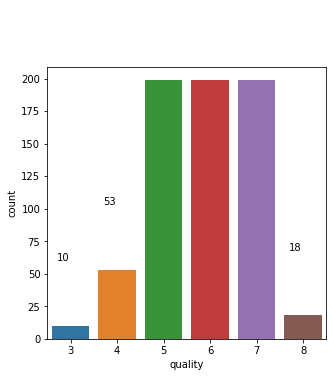

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='quality', data=new_df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


> Now we are over sampling remaining classes to their level

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
x, y = oversample.fit_resample(new_df.drop(['quality'], axis=1), new_df['quality'])

new_df = pd.DataFrame(x, columns=df.drop(['quality'], axis=1).columns)
new_df['quality'] = y

new_df.head()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.1,0.450,0.73,3.2,0.066,6.0,22.0,0.99860,3.17,0.66,11.2,6
1,8.1,0.870,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8,4
2,7.6,0.410,0.33,2.5,0.078,6.0,23.0,0.99570,3.30,0.58,11.2,5
3,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
4,9.5,0.550,0.66,2.3,0.387,12.0,37.0,0.99820,3.17,0.67,9.6,5


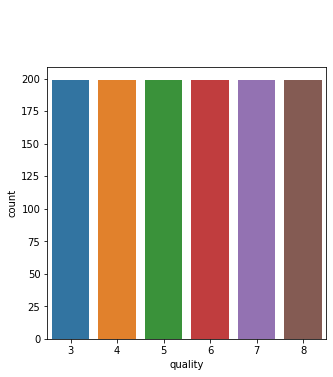

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='quality', data=new_df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


> Here we ca see that all the classes are balanced.

>Let's further see how other attributes are related to each other using pairplot

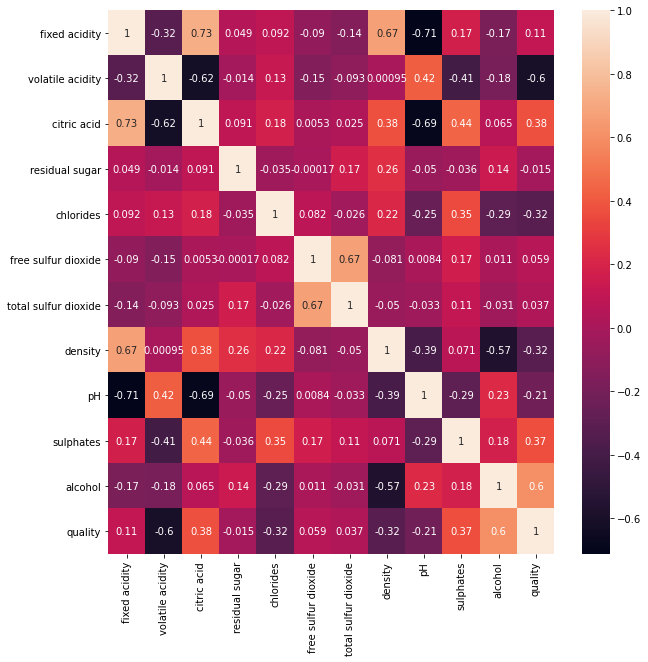

In [ ]:
cormap = new_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cormap, annot = True)

In [ ]:
X = new_df.drop(['quality'], axis=1)
y = new_df['quality']

In [ ]:
# Scale the data to be between -1 and 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.449229,-0.495276,2.078146,0.389962,-0.424369,-0.763386,-0.554000,1.004108,-0.898214,0.003240,0.413007
1,-0.164780,1.119252,-1.227847,0.455889,0.094451,1.112287,0.751380,1.808291,1.652879,0.330177,-0.701622
2,-0.433782,-0.649040,0.266643,-0.071532,-0.216841,-0.763386,-0.520529,-0.409304,-0.126953,-0.432675,0.413007
3,-0.648983,0.446532,-0.639109,-0.401170,-0.251429,-0.200684,-0.620943,-0.526276,-0.186281,-0.650633,-0.462773
4,0.588424,-0.110864,1.761133,-0.203387,5.126997,-0.200684,-0.051931,0.809155,-0.898214,0.057730,-0.860854


In [ ]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Number of features to consider at every split 
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
grid = {'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        }

In [ ]:
clf = GridSearchCV( estimator = DecisionTreeClassifier(),  param_grid = grid, cv = 5)
clf = clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
y_pred = clf.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()


,Actual,Predicted
21,6,6
966,4,4
417,4,4
251,7,5
714,3,3


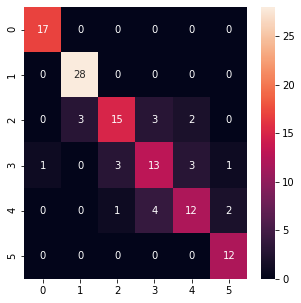

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

In [ ]:
from sklearn import metrics

# Measure the Accuracy Score
print("Accuracy score of the predictions: {0}".format(metrics.accuracy_score(y_pred, y_test)))


Accuracy score of the predictions: 0.8083333333333333
